In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# Load the dataset
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')

# Define features and target variable
X = dataset.drop('expenses', axis=1)
y = dataset['expenses']

# Define preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), ['sex', 'smoker', 'region'])
], remainder='passthrough')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(50, input_dim=11, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1)
])
model.compile(loss='mean_absolute_error', optimizer='adam')


In [18]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=True)
history = model.fit(preprocessor.fit_transform(X_train), y_train, validation_data=(preprocessor.transform(X_test), y_test), callbacks=[monitor], verbose=2, epochs=10000)


Epoch 1/10000
34/34 - 1s - loss: 13336.4580 - val_loss: 12941.8516 - 855ms/epoch - 25ms/step
Epoch 2/10000
34/34 - 0s - loss: 13297.2832 - val_loss: 12889.3701 - 119ms/epoch - 3ms/step
Epoch 3/10000
34/34 - 0s - loss: 13220.7959 - val_loss: 12778.5166 - 97ms/epoch - 3ms/step
Epoch 4/10000
34/34 - 0s - loss: 13064.5039 - val_loss: 12566.8994 - 100ms/epoch - 3ms/step
Epoch 5/10000
34/34 - 0s - loss: 12788.8867 - val_loss: 12215.2090 - 98ms/epoch - 3ms/step
Epoch 6/10000
34/34 - 0s - loss: 12352.7139 - val_loss: 11680.7568 - 101ms/epoch - 3ms/step
Epoch 7/10000
34/34 - 0s - loss: 11714.9512 - val_loss: 10937.4893 - 100ms/epoch - 3ms/step
Epoch 8/10000
34/34 - 0s - loss: 10869.8066 - val_loss: 10035.2832 - 103ms/epoch - 3ms/step
Epoch 9/10000
34/34 - 0s - loss: 9922.1260 - val_loss: 9114.4736 - 96ms/epoch - 3ms/step
Epoch 10/10000
34/34 - 0s - loss: 8990.0049 - val_loss: 8326.8262 - 100ms/epoch - 3ms/step
Epoch 11/10000
34/34 - 0s - loss: 8198.7070 - val_loss: 7875.2725 - 100ms/epoch - 3ms

In [19]:
result = model.evaluate(preprocessor.transform(X_test), y_test, verbose=2)
mae = result  # Assign the result directly to MAE

# Check if the MAE meets the required threshold
if mae < 3500:
    print("Congratulations! You passed the challenge. The Mean Absolute Error is under $3500.")
else:
    print("The Mean Absolute Error is not under $3500. Please try again.")


9/9 - 0s - loss: 2015.9083 - 33ms/epoch - 4ms/step
Congratulations! You passed the challenge. The Mean Absolute Error is under $3500.


9/9 [==============================] - 0s 3ms/step


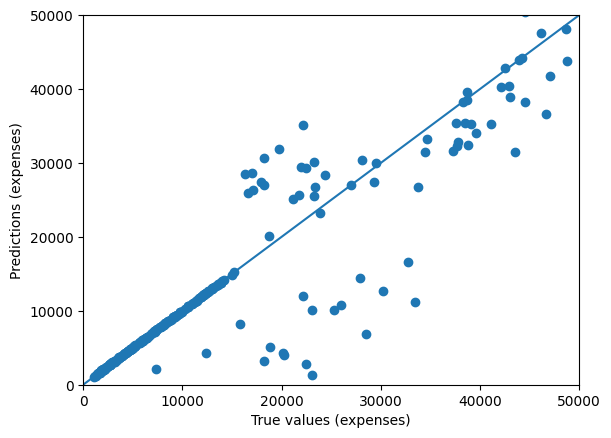

In [20]:
test_predictions = model.predict(preprocessor.transform(X_test)).flatten()
plt.scatter(y_test, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()